# Titanic Survival Prediction using Supervised Learning

---

# Titanic Data Analysis Project

In this project, I will analyze the Titanic dataset, sourced from [Kaggle](https://www.kaggle.com/c/titanic/data). This dataset provides detailed information about the passengers aboard the Titanic during its fateful voyage in the 1910s. It includes data such as passenger names, gender, age, points of embarkation, and survival status. The 'Survived' column in the dataset uses binary coding, where `1` indicates survival, and `0` signifies that the passenger did not survive.

![Titanic Dataset Image](/Users/rashrav/Documents/GitHub/Rashrav.github.io/images/titanic.webp)

## Dataset Overview

The dataset's CSV file contains the following headers:

| PassengerId | Survived | Pclass | Name | Sex | Age | SibSp | Parch | Ticket | Fare | Cabin | Embarked |
| ----------- | -------- | ------ | ---- | --- | --- | ----- | ----- | ------ | ---- | ----- | -------- |

### Field Descriptions

- **PassengerId**: Unique identification number for each passenger.
- **Survived**: Survival status (0 = No; 1 = Yes).
- **Pclass**: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd).
- **Name**: Passenger's name.
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings or spouses aboard.
- **Parch**: Number of parents or children aboard.
- **Ticket**: Ticket number.
- **Fare**: Fare paid by the passenger.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

## Project Objectives

The key objectives of this analysis are:

1. **Data Exploration**: Discover correlations, visualize different variables, and extract meaningful insights.
2. **Data Preparation**: Implement preprocessing techniques to refine the dataset for modeling. This includes addressing null values and outliers.
3. **Data Modeling**: Construct and evaluate predictive models for survival, beginning with a basic logistic regression model and subsequently comparing various supervised learning models.
4. **Model Selection**: Compare the performance of different machine learning models to identify the one with the highest accuracy in predicting survival outcomes.


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
# Reading the CSV File
file_path = 'files/train.csv'  # Define the file path as a variable for easy modification
df = pd.read_csv(file_path)

## Part 1: Data Exploration

In [6]:
# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Displaying the number of rows and columns in the DataFrame
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 891
Number of Columns: 12


In [8]:
# Displaying the statistical summary of the DataFrame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analyzing the Correlation of Numerical Variables with Survival

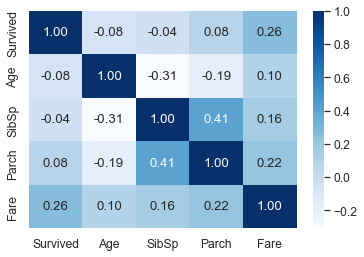

In [9]:
# Creating a heatmap to visualize the correlations
correlation_data = df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
ax = sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='Blues')

### Observations from Correlation Heat Map

- **Fare**: Shows the highest correlation with survival. This suggests that passengers who paid higher fares had a higher chance of survival.
- **Age**: Has a slightly negative correlation with survival (-0.08), indicating that older passengers had a marginally higher chance of not surviving.
- **SibSp**: Also displays a negative correlation with survival. This could mean that passengers with siblings or spouses on board had a lower chance of survival.
- **Parch**: Exhibits a positive correlation with survival, suggesting that passengers with parents or children on board were given priority and thus had a higher chance of survival.


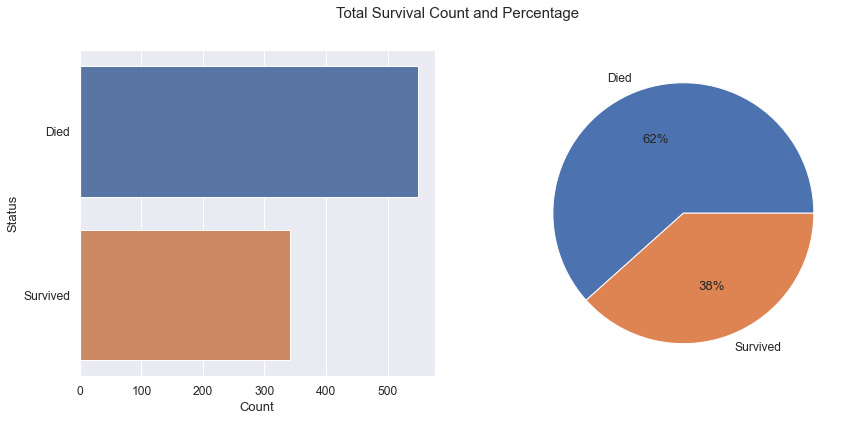

Total Number of people who died: 549
Total Number of people who died: 12


In [10]:
# Visualization of The Total Passengers on Titanic Who Survived and Died

# Setting up the figure for side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Total Survival Count and Percentage", size=15)

# Preparing data for the plots
number_died = df[df['Survived'] == 0].shape[0]
number_survived = df[df['Survived'] == 1].shape[0]
data = [number_died, number_survived]
labels = ['Died', 'Survived']
colors = sns.color_palette('deep')[0:2]

# Creating a bar plot
sns.barplot(labels, data, ax=ax1, palette=colors)
ax1.set_xlabel('Status', fontsize=13)
ax1.set_ylabel('Count', fontsize=13)

# Creating a pie chart
ax2.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

# Showing the plots
plt.show()

# Printing the values
print("Total Number of People Who Died:", number_died)
print("Total Number of People Who Survived:", number_survived)

Reflection on the Titanic Tragedy
- Out of the 891 passengers recorded in the dataset, 549 people, which constitutes approximately 62% of the passengers, tragically lost their lives. This outcome is particularly heartrending considering that the Titanic was touted as the "Unsinkable Ship." The high casualty rate starkly contradicts the ship's reputation, highlighting the enormity of the disaster and its impact on maritime history.

Mean age of person on board 30


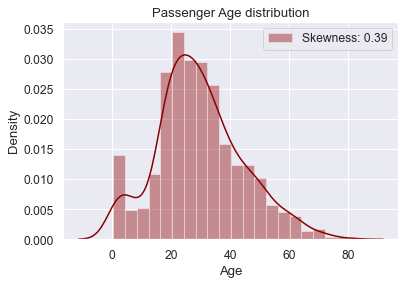

In [11]:
# Passenger Age Distribution

# Creating the distribution plot for passenger age
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'].dropna(), color="DarkRed", label=f"Skewness: {df['Age'].skew():.2f}")
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(loc='best')

# Displaying the plot
plt.show()

# Calculating and printing the mean age
mean_age = round(df['Age'].mean(), 2)
print(f"Mean age of person on board: {mean_age}")

### Observations from the Age Distribution

- The majority of the survivors were in their 20s to 30s, indicating that younger individuals had a higher survival rate.
- The mean age of the passengers on board is approximately 30 years.
"""

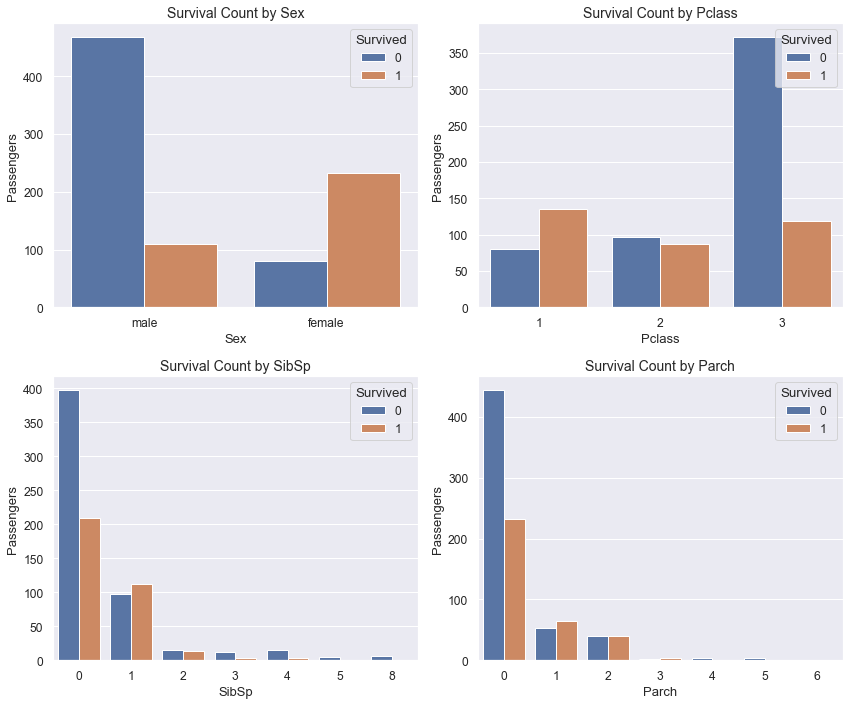

In [12]:
# Visualization of Survival Count based on Various Features

cols = ['Sex', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 2

# Setting up the subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c  # Index to go through the number of columns
        ax = axs[r][c]  # Position each subplot
        sns.countplot(df[cols[i]], hue=df['Survived'], ax=ax, palette='Set2')
        ax.set_title(f'Survival Count by {cols[i]}', fontsize=15)
        ax.legend(title='Survived', loc='upper right')
        ax.set_xlabel(cols[i], fontsize=13)
        ax.set_ylabel('Passengers', fontsize=13)

plt.tight_layout()
plt.show()

### Key Insights from Visualization

- The number of male passengers was significantly higher than female. However, a larger proportion of female passengers survived.
- The survival rate was notably lower for passengers

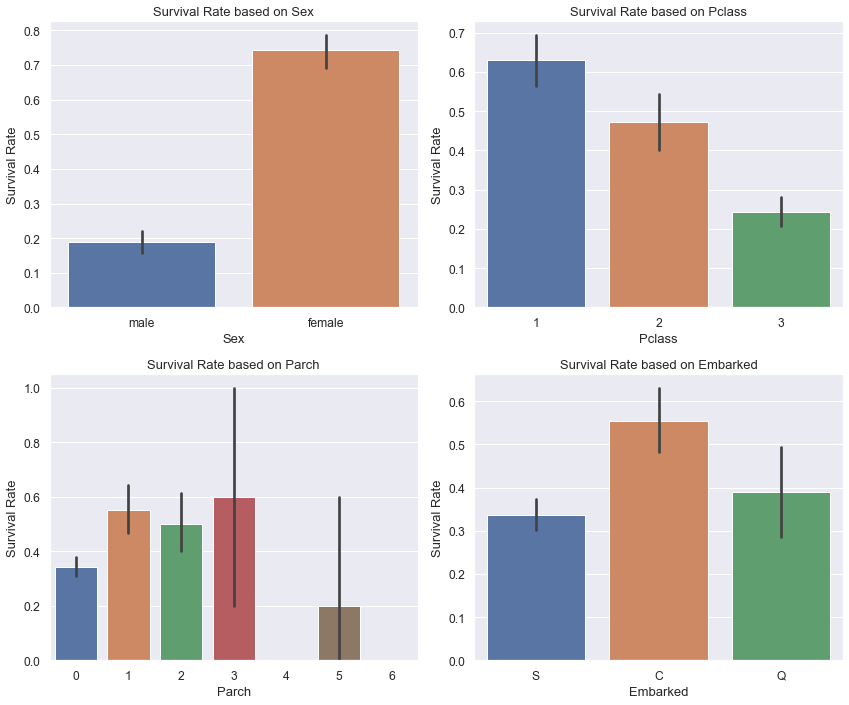

In [13]:
# Visualization of Survival Rate Based on Various Features

cols = ['Sex', 'Pclass', 'Parch', 'Embarked']

n_rows = 2
n_cols = 2

# Setting up the subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c  # Index to go through the number of columns
        ax = axs[r][c]  # Position each subplot
        sns.barplot(x=cols[i], y='Survived', data=df, ax=ax, palette='coolwarm')
        ax.set_title(f"Survival Rate Based on {cols[i]}", size=15)
        ax.set_xlabel(cols[i], fontsize=13)
        ax.set_ylabel('Survival Rate', fontsize=13)

plt.tight_layout()
plt.show()

### Key Insights

- **Gender**: Significantly influenced survival chances. Females had a higher survival rate (74%) compared to males (19%). This likely reflects the priority given to women and children during the disaster.
- **Passenger Class**: A crucial determinant of survival. Passengers in the first and second classes had higher survival rates compared to those in the third class. Lower passenger classes, generally associated with wealthier individuals, corresponded to a higher chance of survival.
- **Family on Board (Parch)**: Passengers without parents or children on board tended to have a lower survival rate.
- **Port of Embarkation**: The embarkation point also played a role in survival rates. Passengers embarking from Cherbourg showed a higher survival rate, in contrast to those from Southampton, who had the lowest.
"""

## Part 2: Data Preparation
In this stage, we focus on addressing missing age data in our dataset. Rather than discarding rows with missing age information, we consider a more sophisticated approach. Instead of imputing the missing ages with the overall mean age of all passengers, we explore the idea of using the average age by passenger class. This method is expected to yield more accurate imputation results due to the variations in age across different classes.

In [14]:
# Checking for NaN values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualization of Missing Values
To visualize where the missing data are, we can employ Seaborn to create a simple heatmap:

<AxesSubplot:>

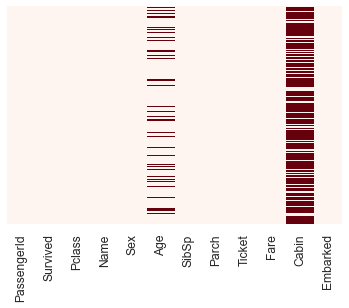

In [15]:
# Visualization of missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Reds')

As observed from the heatmap, there is a significant number of null values in the 'Cabin' column. With more than 600 missing values, it seems prudent to remove this column entirely. Conversely, the 'Age' column has about 20% of its data missing. This proportion is reasonably small, enabling us to make an informed replacement by taking the mean age of the passengers on board.

Additionally, the 'Embarked' column has two missing values. In this case, it is feasible to drop the rows where 'Embarked' is null, as they constitute a very small fraction of the dataset.

Text(0.5, 1.0, 'Pclass By Age Box-Plot')

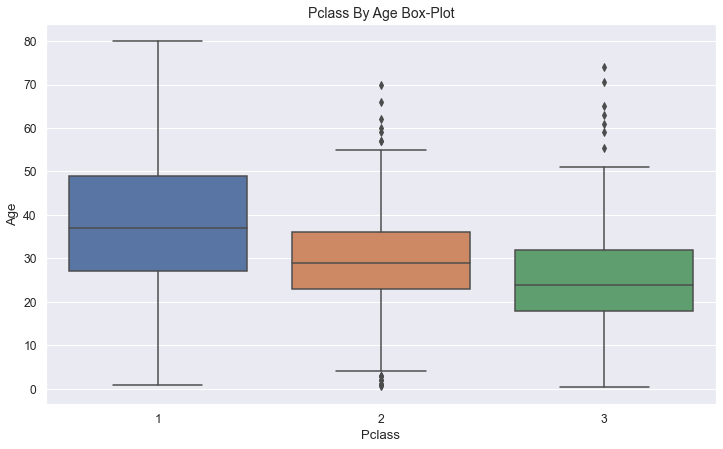

In [16]:
# Comparing Age with PClass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title("Pclass By Age Box-Plot", size = 14)

In the box plot displayed above, a clear trend is observed indicating that wealthier passengers in the higher classes tend to be older. This observation aligns well with the socio-economic patterns of the early 20th century, where wealth often correlated with age. Given the positive correlation between age and Pclass, these average age values will be utilized to impute missing age data based on Pclass.

**Mean value of Age for each PClass**
* **PClass 1:** 37 years
* **PClass 2:** 29 years
* **PClass 3:** 24 years

This stratified approach to imputation helps ensure a more accurate and representative data set, which is crucial for the subsequent stages of analysis.

### Replacing Null Values in Age with Its Mean Value Based on PClass
To address the missing age values in our dataset, we will implement a function that replaces these null values with the mean age corresponding to each passenger class. This strategy ensures a more accurate and class-specific age imputation.

In [17]:
# Creating a function to replace the null age values with the mean age based on the PClass
def impute_age(cols):
    Age, Pclass = cols

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
# Applying the function to replace the NaN values in the Age column
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

**Dropping Columns That Are Not Useful for Predictive Modeling**

In our data preparation process, it's crucial to remove features that are unlikely to contribute to the predictive modeling. The rationale for dropping specific columns is as follows:

* PassengerId: It is unique for every data, thus, won't help in predicting the survivability
* Cabin: More than 600 values are missing on the Cabin Column
* Name: Isn't a useful feature for modelling
* Ticket: Is unique for every data, therefore, won't help us in predicting survivability

In [19]:
# Dropping the columns
df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Dropping the remaining rows where null values exist
df.dropna(inplace=True)

In [42]:
# Verifying the changes
print(f"Updated DataFrame shape: {df.shape}")
print("2 rows and 4 columns were dropped.")
df.isna().sum()

(889, 8)
2 rows and 4 columns were dropped.


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Converting Categorical Variables to Numerical Using Ordinal Encoding
Before proceeding to build machine learning models, it's important to convert categorical variables into numerical formats. Machine learning algorithms typically require numerical input, so this conversion is crucial for effective modeling.

In [38]:
#Searching for Categorical Variables
df.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked       int8
dtype: object

In order to proceded towards building machine learning models, the type 'object' are converted to numerical values so that these features can be used to predict the survivability. Here, we convert the 'Sex' and 'Embarked' columns from categorical to numerical values using ordinal encoding:

In [23]:
# Converting 'Sex' to numerical values
df['Sex'] = df['Sex'].astype('category').cat.codes

# Converting 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].astype('category').cat.codes

# Displaying the first few rows to verify the changes
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Updated Field Description**

* __Sex__ - the passenger's sex (0 = Male; 1 = Female)
* __Embarked__ - port of embarkation (0 = Cherbourg; 1 = Queenstown; 2 = Southampton)

With these conversions, the dataset is now appropriately formatted for modeling.

## Part 3: Data Modelling

Since the size of the dataset isn't very large and there are clearly labeled data for training, I will be using Suerpervised Learning Models and evaluate its performances.

### Defining a baseline performance using a Simple Logistic Regression Model

In [24]:
# Feature Selection
X = df.drop('Survived',axis=1) #Selecting our predictors
y = df['Survived'] #Selecting our Reponse Variable

In [25]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

* 80% of the data is used to train the Logistic Regression model and the remaining 20% of the data will be used to test and evaluate the model

In [26]:
#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Performing Recursive Feature Estimation

In [27]:
from sklearn.feature_selection import RFE

# Estimating accuracy score on test by using different number of features
acc_scores = []
for i in range(1,6):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Accuracy on test set using", i, "features: ", round(acc_score,4))
    # append to the list
    acc_scores.append(acc_score)


Accuracy on test set using 1 features:  0.7865
Accuracy on test set using 2 features:  0.7865
Accuracy on test set using 3 features:  0.7865
Accuracy on test set using 4 features:  0.809
Accuracy on test set using 5 features:  0.8146


Number of features to select: 5
Final Accuracy Score: 0.7865


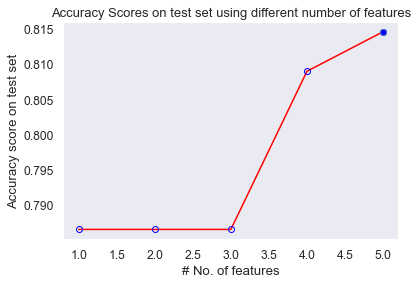

In [28]:
#Visualisation of the accuracy score using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 6):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item > acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 6), acc_scores, marker = 'o', color = 'red', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'blue')
print("Number of features to select:", best)
plt.title("Accuracy Scores on test set using different number of features", size=13)
print("Final Accuracy Score:",0.7865)

* We can clearly observe hat the accuracy of the test increases as number of features increases. Using 5 feature generated the highest accuracy score of 0.7865

### Creating functions with various Advanced Machine Learning Models

In [29]:
def models(X_train,Y_train):
    
    #Logistic Regression model
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    # Through Process of Trial and error, The optimal k value which received highest accuracy was 4.
    knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2) 
    knn.fit(X_train, y_train)
    
     #Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
    tree.fit(X_train, y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #Print Training accuracy for each model
    print("[0]Logistic Regression Training Accuracy: ", log.score(X_train,y_train))
    print("[1]K-Nearest Neighbors Training Accuracy: ", knn.score(X_train,y_train))
    print("[2]Gaussian Naive Bayes Training Accuracy: ", gauss.score(X_train,y_train))
    print("[3]Decision Tree Training Accuracy: ", tree.score(X_train,y_train))
    print("[4]Random Forest Training Accuracy: ", forest.score(X_train,y_train))

    
    return log, knn, gauss, tree, forest

In [30]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.8030942334739803
[1]K-Nearest Neighbors Training Accuracy:  0.8551336146272855
[2]Gaussian Naive Bayes Training Accuracy:  0.790436005625879
[3]Decision Tree Training Accuracy:  0.9859353023909986
[4]Random Forest Training Accuracy:  0.9690576652601969


In [31]:
#Storing the accuracy score for testset for every model in a variable
log_ac=accuracy_score(y_test,model[0].predict(X_test))
knn_ac=accuracy_score(y_test,model[1].predict(X_test))
gauss_ac=accuracy_score(y_test,model[2].predict(X_test))
tree_ac=accuracy_score(y_test,model[3].predict(X_test))
forest_ac=accuracy_score(y_test,model[4].predict(X_test))

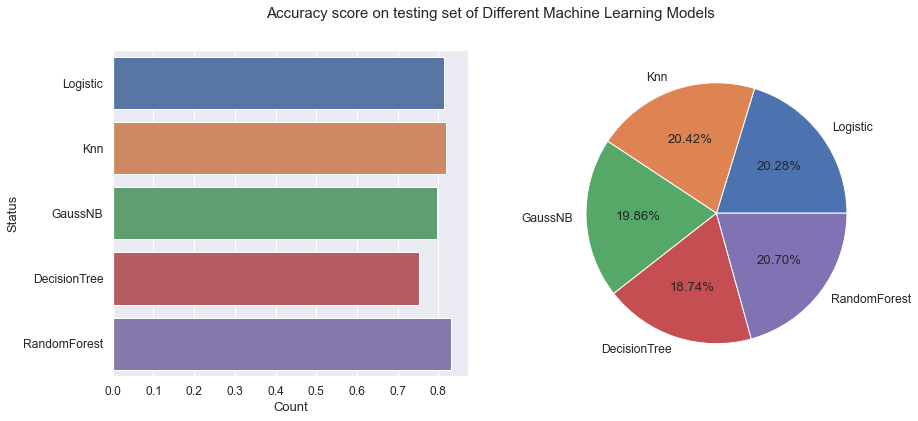

Best models (From best Accuracy to worst on testing set)

Random Forest Testing Accuracy 0.8315
K-Nearest Neighbors Testing Accuracy 0.8202
Logistic Regression Testing Accuracy 0.8146
Gaussian Naive Bayes Regression Testing Accuracy 0.7978
Decision Tree Testing Accuracy 0.7528


In [37]:
#Visualization of The total passengers on Titanic who survived and died
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle("Accuracy score on testing set of Different Machine Learning Models",size=15)

data = [log_ac,knn_ac,gauss_ac,tree_ac,forest_ac]
labels = ['Logistic', 'Knn','GaussNB','DecisionTree','RandomForest']

colors = sns.color_palette('deep')[0:5]

#creating side by side comparative plots
ax2.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
sns.barplot(data,labels,ax=ax1)
ax1.set_xlabel('Count',fontsize=13)
ax1.set_ylabel('Status',fontsize=13)
plt.show()

#Printing the values
print("Best models (From best Accuracy to worst on testing set)")
print()
print("Random Forest Testing Accuracy",round(forest_ac,4))
print("K-Nearest Neighbors Testing Accuracy",round(knn_ac,4))
print("Logistic Regression Testing Accuracy",round(log_ac,4))
print("Gaussian Naive Bayes Regression Testing Accuracy",round(gauss_ac,4))
print("Decision Tree Testing Accuracy",round(tree_ac,4))


      

### Observation and Analysis
* Random Forest seems to be the best model to predict survivability as it has the highest accuracy on both training and testing data, followed by K-Nearest Neighbors.
* Decision Tree seems to be the least accurate model with a accuracy score of only 0.75 on Testing Data But it had the highest accuracy on the training data (0.985). This may be due to overfitting of data. In general, Decision Trees work great with the data used to train them, but they are not flexible when it comes to classifying new samples. 
* Random Forests combine the simplicity of decision trees with flexibility resulting in a vast improvement in accuracy as seen with the increased accuracy on testing data.
* The difference between the accuracy score of different model isn't that huge. Every model does a great job in predicting the survivability of the passenger





### Confusion Matrix 

**Terminologies**
* True Positives: When the passenger didn't survive and the model predicts correctly   
* True Negatives: When the passenger survived but the model predicts correctly
* False Positives (Type I Error): When the passenger died but the algorithm said it didn't 
* False Negatives (When the passenger survived and the algorithm said he/she died) 

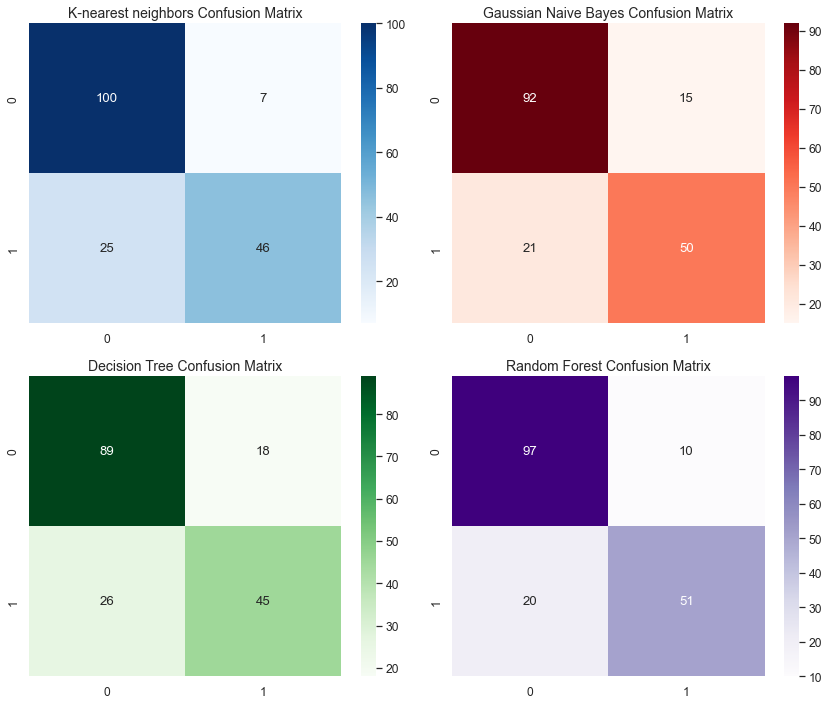

In [33]:
#Visualization of Confusion Matrix

# Visualization of Survival Rate based on Various features
cols = ['Knn','Gauss','Embarked',]

n_rows = 2
n_cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols * 6, n_rows * 5))
ax1 = axs[0][0]

sns.heatmap(confusion_matrix(y_test, model[1].predict(X_test)), annot=True,fmt='', cmap='Blues',ax=ax1)
ax1.set_title("K-nearest neighbors Confusion Matrix", size=14)

ax2 = axs[0][1]
sns.heatmap(confusion_matrix(y_test, model[2].predict(X_test)), annot=True,fmt='', cmap='Reds',ax=ax2)
ax2.set_title("Gaussian Naive Bayes Confusion Matrix", size=14)

ax3 = axs[1][0]
sns.heatmap(confusion_matrix(y_test, model[3].predict(X_test)), annot=True,fmt='', cmap='Greens',ax=ax3)
ax3.set_title("Decision Tree Confusion Matrix", size=14)

ax4 = axs[1][1]
sns.heatmap(confusion_matrix(y_test, model[4].predict(X_test)), annot=True,fmt='', cmap='Purples',ax=ax4)
ax4.set_title("Random Forest Confusion Matrix", size=14)
plt.tight_layout()

**Observation and Analysis**

In our analysis of different machine learning models for predicting the survivability of Titanic passengers, several key observations were made:

- **K-Nearest Neighbors (KNN)**: KNN emerged as the top-performing model for predicting passengers who did not survive, achieving a perfect accuracy rate of 100%. This model excelled in identifying passengers who did not survive the tragic event.

- **Random Forest**: Random Forest outperformed other models when it came to predicting passengers who survived. It correctly predicted the survival of 51 passengers, showcasing its effectiveness in capturing survival patterns in the data.

- **Decision Tree**: While Decision Tree performed reasonably well, it had the highest combined Type I and Type II errors among the models. This model made a total of 44 incorrect predictions, consisting of 18 Type I errors (false positives) and 26 Type II errors (false negatives).

- **Gaussian Naive Bayes**: Gaussian Naive Bayes demonstrated better accuracy than KNN in predicting passengers who survived, although it fell short of Random Forest's performance in this regard.

--- 

## Conclusion

In conclusion, Random Forest emerged as the most effective model for predicting the survivability of Titanic passengers in our analysis. It achieved the highest number of correct predictions (148) and exhibited the lowest error rate (30%). KNN excelled in predicting passengers who did not survive, while Decision Tree, while reasonable, had a higher rate of misclassifications. Gaussian Naive Bayes performed well but was surpassed by Random Forest in predicting passenger survival. The choice of the most suitable model may depend on specific use cases and objectives, but based on overall performance, Random Forest stands out as the preferred choice for this prediction task.

--- 
